In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#download dataset from Kaggle in xlxs format

df = pd.read_excel('/Users/rroha/Downloads/Coffee Shop Sales.xlsx')

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [7]:
#identify if there is any missing value in the dataset

missing_values = df.isnull().sum()
print(missing_values)

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [10]:
#convert transaction_time to timedelta dtype
#adding the transaction_date to transaction_time

df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [11]:
# create a new column 'sales'
df['sales'] = df['transaction_qty'] * df['unit_price']

In [12]:
# create a new column 'datetime'
df['datetime'] = df['transaction_date'] + df['transaction_time']

In [13]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [14]:
#perform a basic descriptive statistic to understand to understand trends and patterns

df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [15]:
df_location = df.groupby('store_location').agg({
    'sales': 'sum',
    'transaction_id': 'count'
})

df_location

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [17]:
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['sales'].sum().unstack()
#unstack after grouping for a more readeble data

daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


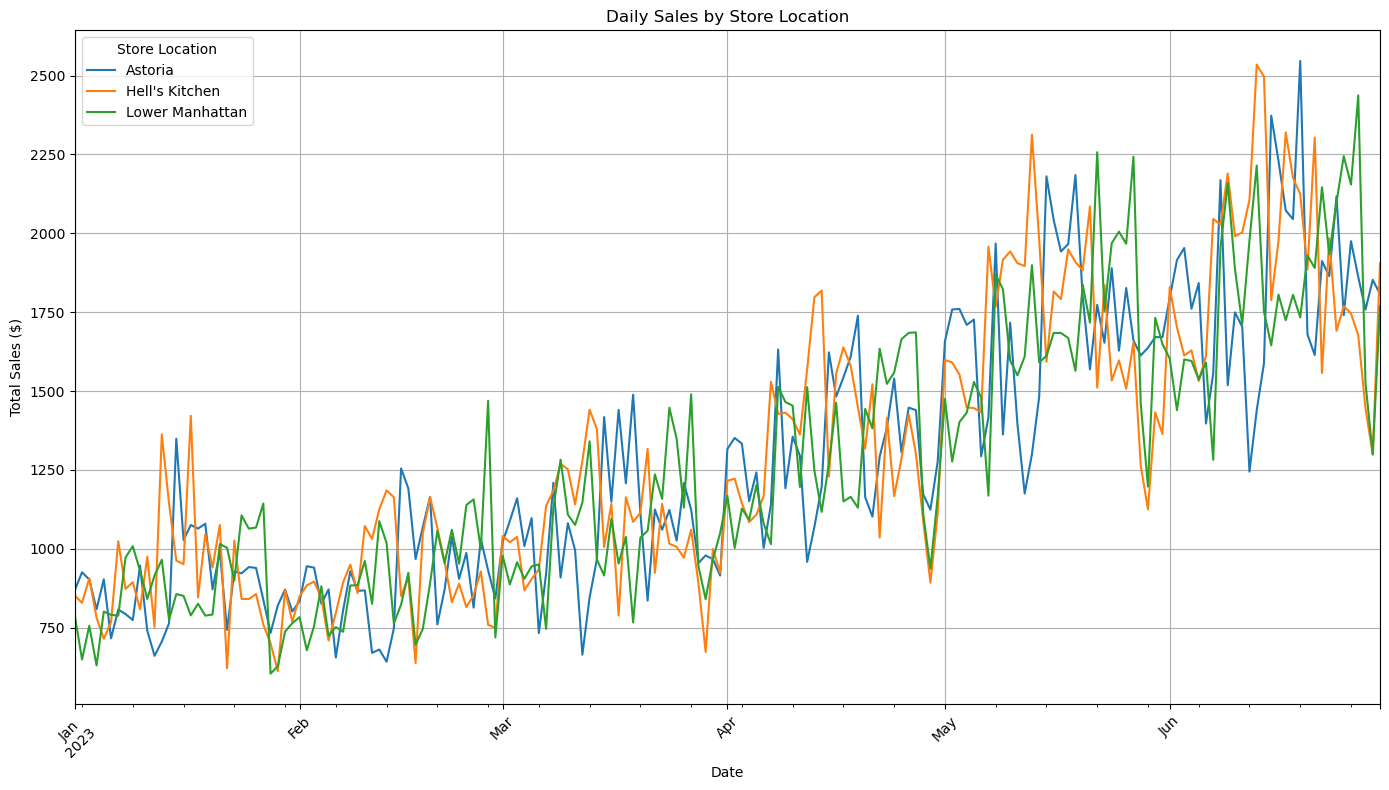

In [23]:
daily_sales_by_location.plot(figsize=(14, 8), title='Daily Sales by Store Location')

plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

#show the plot
plt.show()

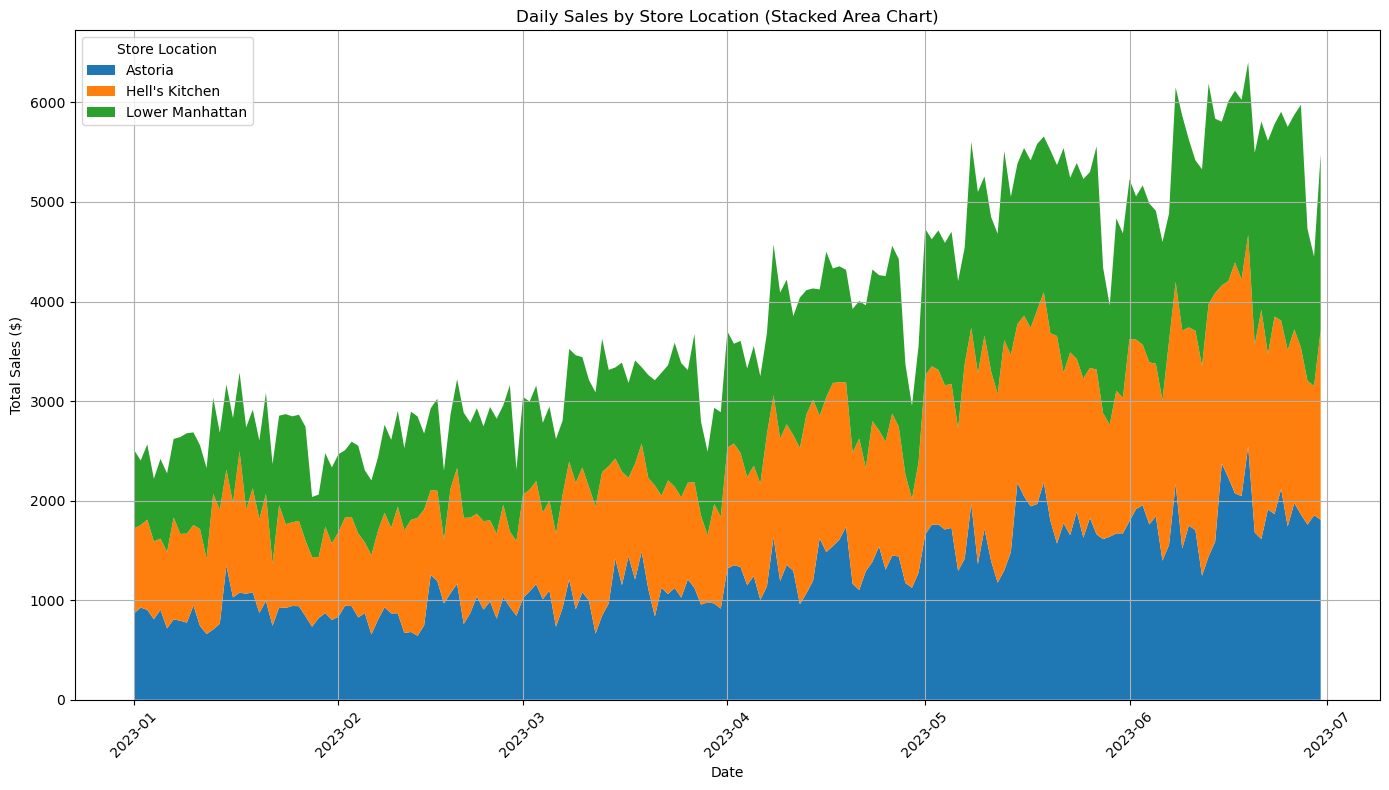

In [24]:
plt.figure(figsize=(14, 8))

plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels=daily_sales_by_location.columns)
#x-axis values are date/index, y-axis values are transposed sales by location
plt.title('Daily Sales by Store Location (Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

#show the plot
plt.show()


In [26]:
#lets do time series analysis
#Analyze the sales trend over time, daily, weekly, monthly

daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

df['day_of_week'] = df['datetime'].dt.day_name()

weekly_sales = df.groupby('day_of_week')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

df['month'] = df['datetime'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

daily_sales, weekly_sales, monthly_sales

(    transaction_date    sales
 0         2023-01-01  2508.20
 1         2023-01-02  2403.35
 2         2023-01-03  2565.00
 3         2023-01-04  2220.10
 4         2023-01-05  2418.85
 ..               ...      ...
 176       2023-06-26  5875.90
 177       2023-06-27  5975.65
 178       2023-06-28  4728.90
 179       2023-06-29  4450.75
 180       2023-06-30  5481.32
 
 [181 rows x 2 columns],
   day_of_week      sales
 0      Monday  101677.28
 1     Tuesday   99455.94
 2   Wednesday  100313.54
 3    Thursday  100767.78
 4      Friday  101373.00
 5    Saturday   96894.48
 6      Sunday   98330.31,
      month      sales
 0  2023-01   81677.74
 1  2023-02   76145.19
 2  2023-03   98834.68
 3  2023-04  118941.08
 4  2023-05  156727.76
 5  2023-06  166485.88)

In [ ]:
#findings: 
#total daily sales rise significantly with some days experience in high sales than other.
#sales seem to increase towards the end of anlaysis period
#daily sales consistantly higher in June compared to January

#weekly sales trend are relatively consistant through out the week
#monday has the highest total sales followed closely by wednesday,thursday and friday
#saturday and sunday have slightly lower sales

#monthly sales trend increase months over months from january to june
#june has the highest total sales

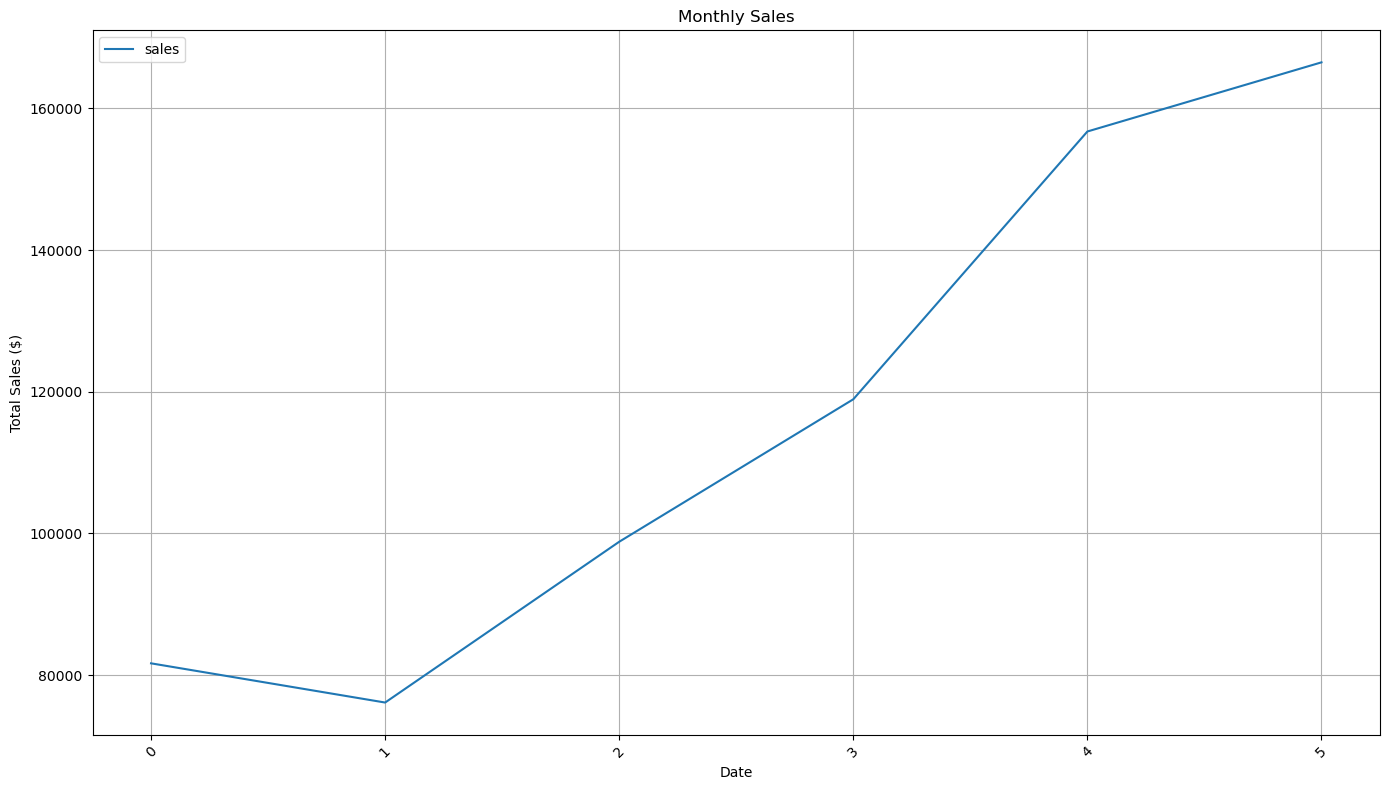

In [29]:
monthly_sales.plot(figsize=(14,8), title='Monthly Sales')

plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [30]:
weekly_sales = df.groupby(['day_of_week', 'store_location'])['sales'].sum().unstack()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)

weekly_sales


store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


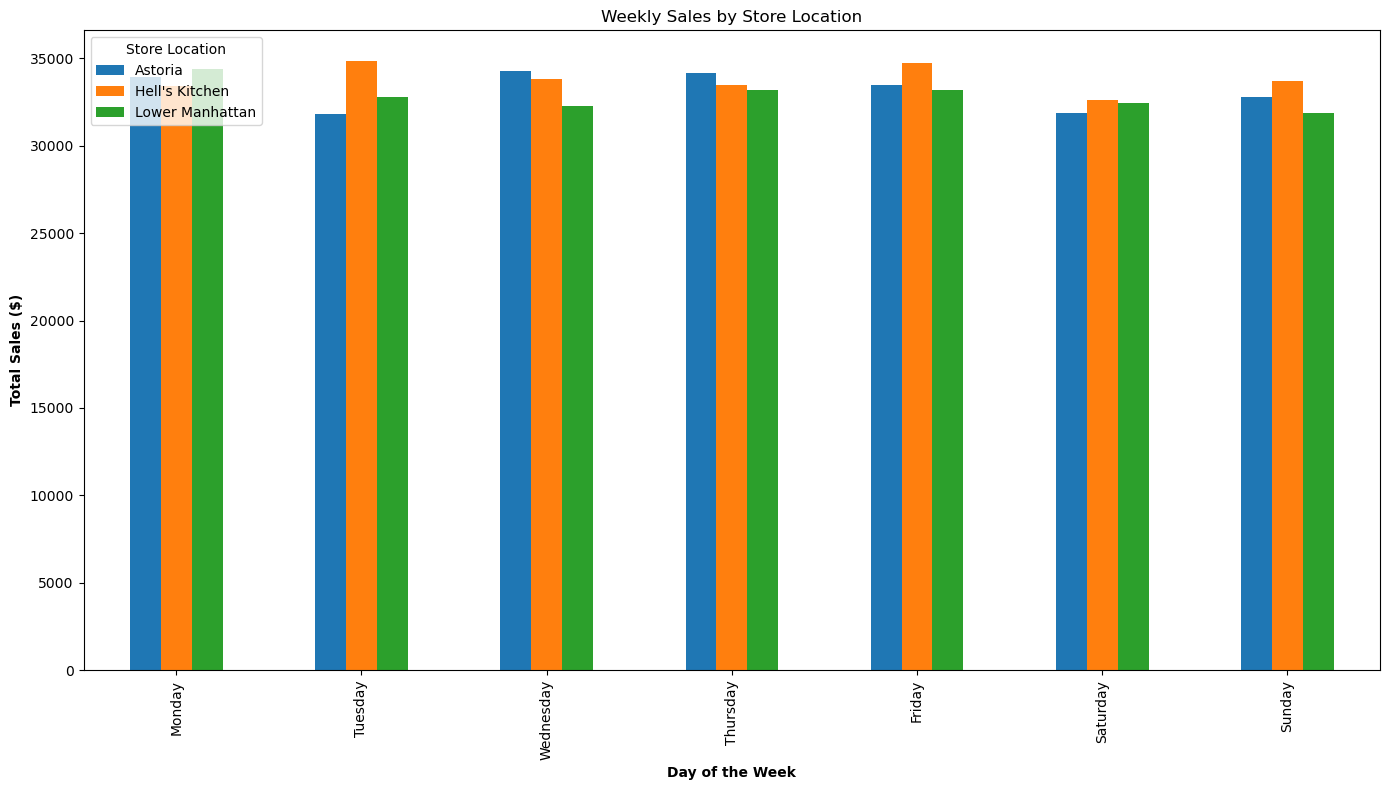

In [31]:
weekly_sales[["Astoria", "Hell's Kitchen", "Lower Manhattan"]].plot(kind='bar', figsize=(14, 8))

plt.xlabel('Day of the Week', fontweight='bold')
plt.ylabel('Total Sales ($)', fontweight='bold')
plt.title('Weekly Sales by Store Location')
plt.legend(title='Store Location', loc='upper left')

plt.tight_layout()
plt.show()

In [32]:
df_category = df.groupby('product_category').agg({
    'sales': 'sum',
    'transaction_id': 'count'
}).sort_values('sales', ascending = False)

df_category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


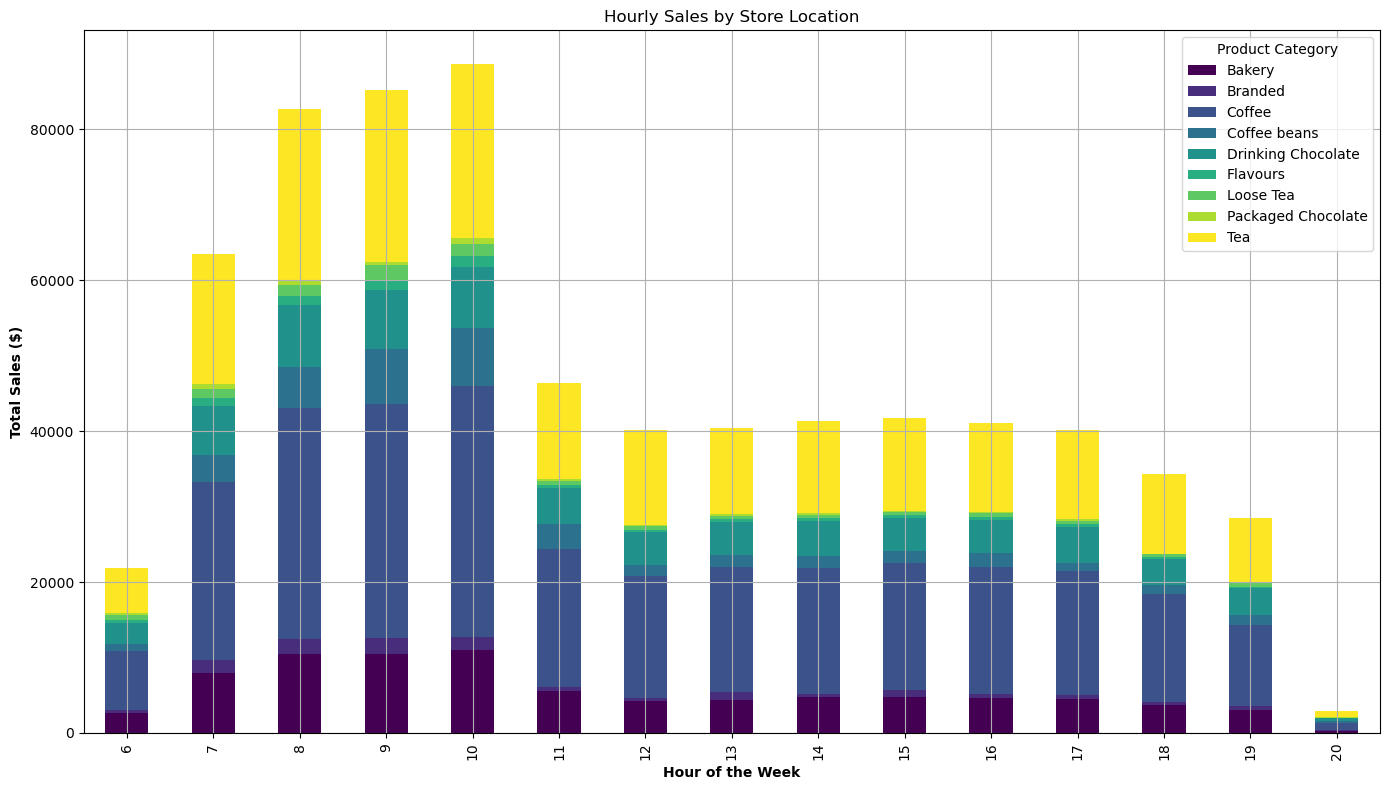

In [34]:
df['hour'] = df['datetime'].dt.hour

hourly_sales_by_product = df.groupby(['hour', 'product_category'])['sales'].sum().unstack()

hourly_sales_by_product.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.xlabel('Hour of the Week', fontweight='bold')
plt.ylabel('Total Sales ($)', fontweight='bold')
plt.title('Hourly Sales by Store Location')
plt.legend(title='Product Category', loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()

In [35]:
df_category['avg_sales'] = df_category['sales']/df_category['transaction_id']
df_category

,sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


In [ ]:
#highest avg sales per transactions are coffee beans with 22.8667 
#followed by branded which is 18.2155
#lowes avg sales per transactions is Flavours with 1.2384

In [36]:
sales_by_product = df.groupby('product_type').agg({
    'sales': 'sum',
    'unit_price': 'mean'
}).sort_values('sales', ascending = False)

sales_by_product

,sales,unit_price
product_type,,
Barista Espresso,91406.20,3.655200
Brewed Chai tea,77081.95,2.936993
Hot chocolate,72416.00,4.148827
Gourmet brewed coffee,70034.60,2.696641
Brewed Black tea,47932.00,2.744670
Brewed herbal tea,47539.50,2.744731
Premium brewed coffee,38781.15,3.122452
Organic brewed coffee,37746.50,2.898021
Scone,36866.12,3.534638


In [38]:
product_sales_df = df.groupby(['product_category', 'product_type'])['sales'].sum().reset_index()
product_sales_df
                                                            


,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


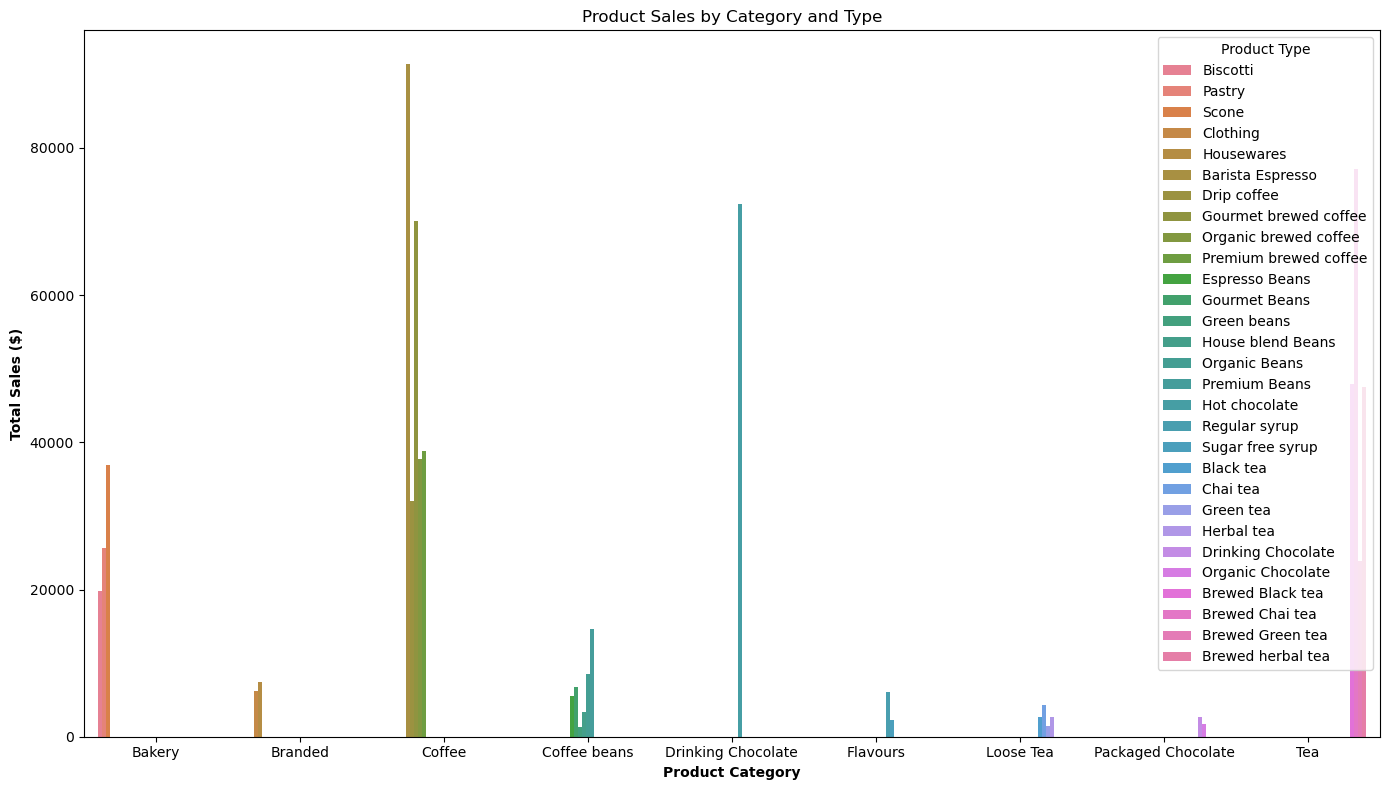

In [42]:
plt.figure(figsize=(14,8))
sns.barplot(data=product_sales_df, x='product_category', y='sales', hue='product_type')

plt.title('Product Sales by Category and Type')
plt.xlabel('Product Category', fontweight='bold')
plt.ylabel('Total Sales ($)', fontweight='bold')
plt.legend(title='Product Type', loc='upper right')
plt.tight_layout()

plt.show()

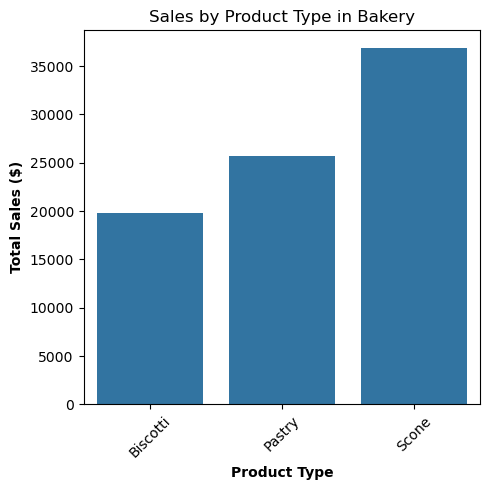

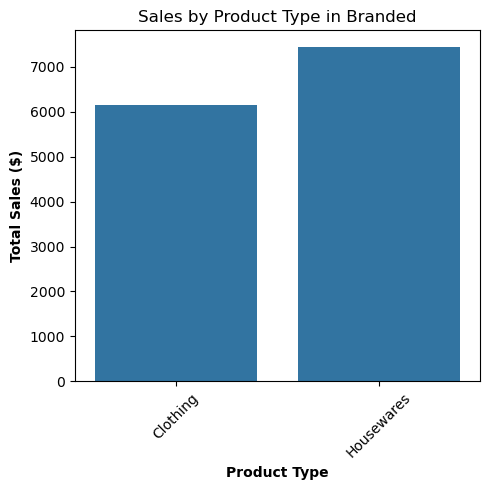

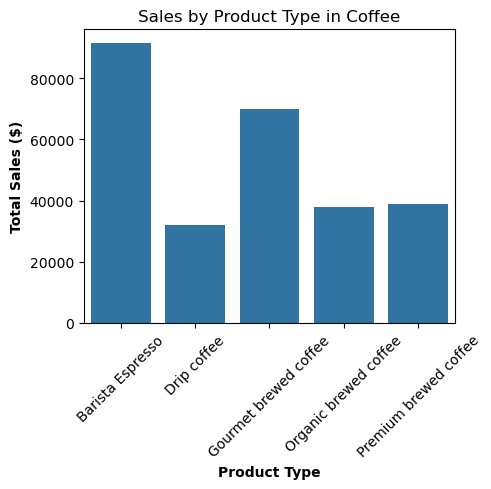

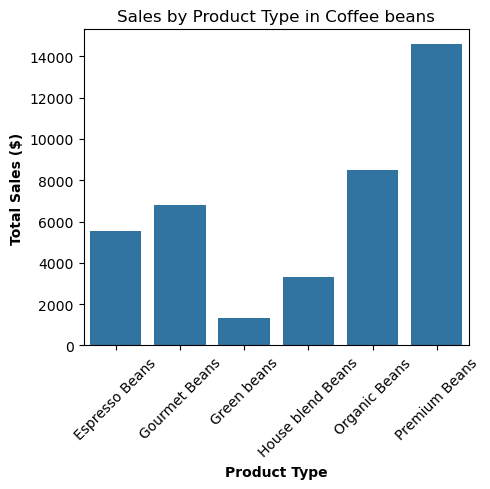

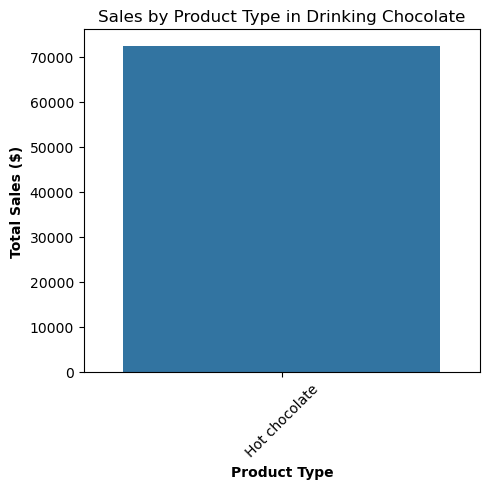

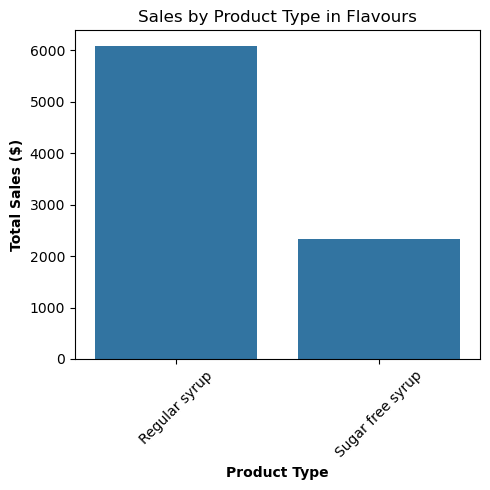

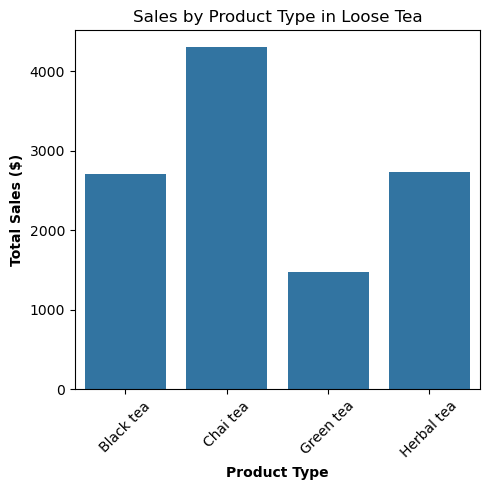

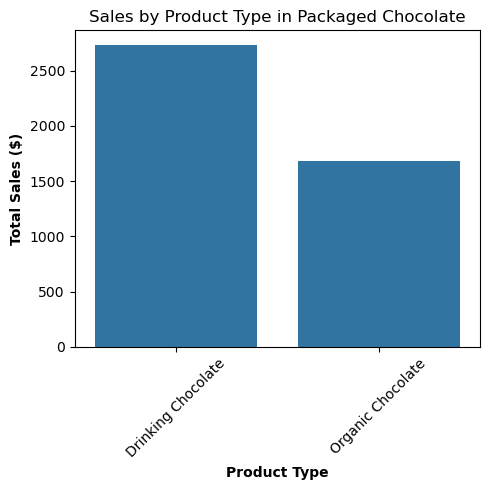

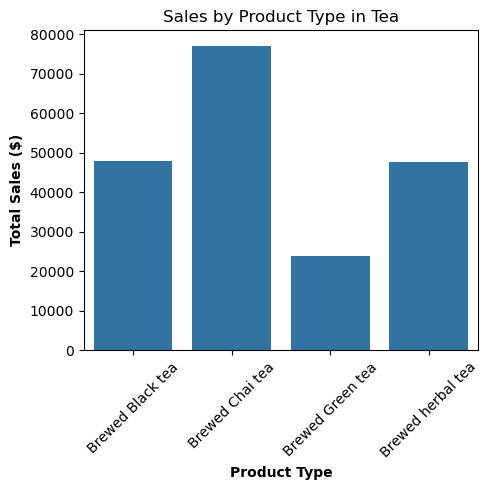

In [44]:
categories = product_sales_df['product_category'].unique()

for category in categories:
    plt.figure(figsize=(5,5))
    category_data = product_sales_df[product_sales_df['product_category'] == category]
    sns.barplot(data=category_data, x='product_type', y='sales')

    plt.title(f'Sales by Product Type in {category}')
    plt.xlabel('Product Type', fontweight='bold')
    plt.ylabel('Total Sales ($)', fontweight='bold')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    

In [45]:
hourly_sales_by_location = df.groupby(['store_location', 'hour'])['sales'].sum().reset_index()

hourly_sales_by_location            

,store_location,hour,sales
0,Astoria,7,19028.80
1,Astoria,8,22805.90
2,Astoria,9,23183.57
3,Astoria,10,24426.12
4,Astoria,11,15498.13
5,Astoria,12,15681.20
6,Astoria,13,15947.87
7,Astoria,14,15175.27
8,Astoria,15,15651.95
9,Astoria,16,16110.85


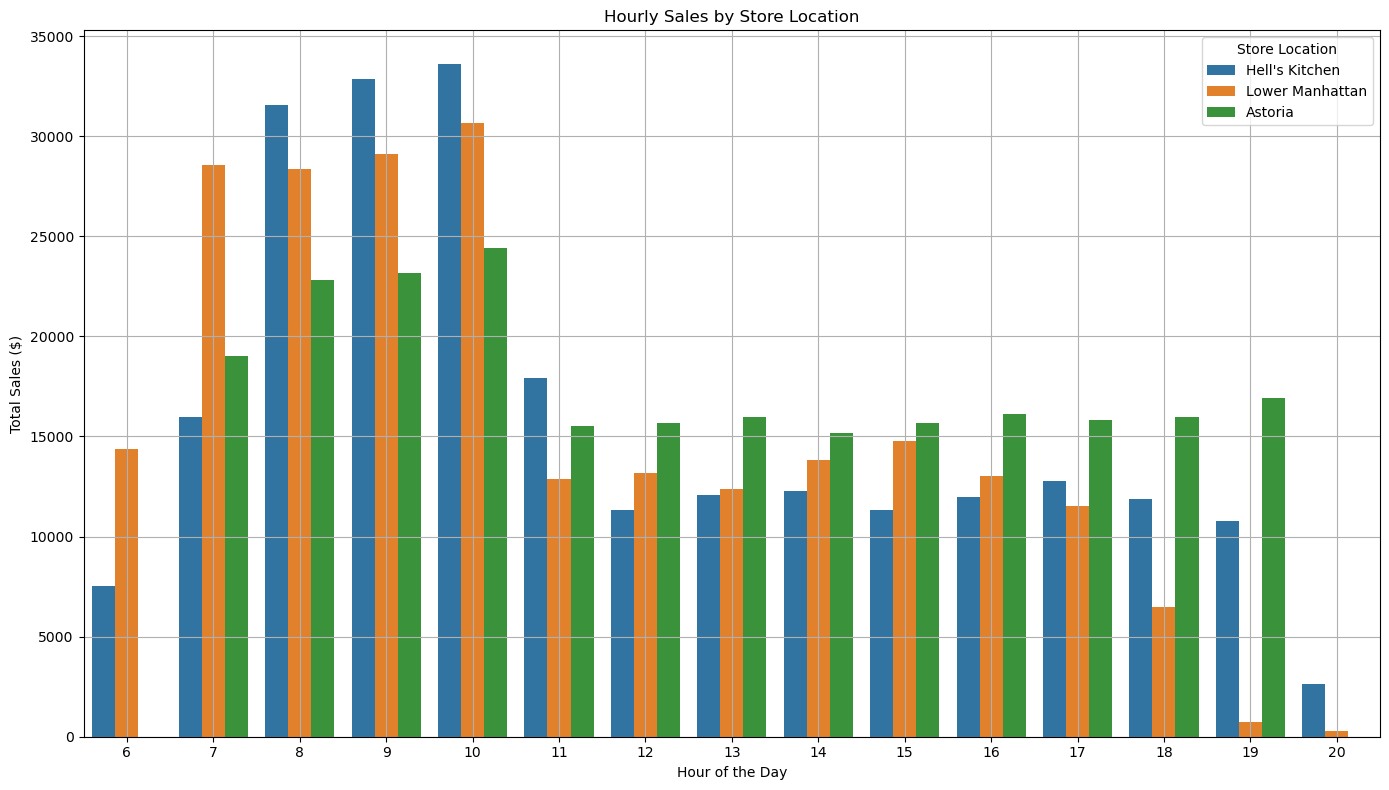

In [50]:
plt.figure(figsize=(14,8))
sns.barplot(data=hourly_sales_by_location, x='hour', y='sales', hue='store_location')

plt.title('Hourly Sales by Store Location')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location', loc='upper right')
plt.grid(True) 
plt.tight_layout()
plt.show()